### 2차원 이미지

In [2]:
import imageio

img_arr = imageio.imread("./data/p1ch4/image-dog/bobby.jpg")
img_arr.shape

/var/folders/t9/qppwntn17hlfp30wqvkm09280000gn/T/ipykernel_95353/2478183331.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread("./data/p1ch4/image-dog/bobby.jpg")


(720, 1280, 3)

In [3]:
import torch

# img에서 픽셀을 변경하면 out의 픽셀도 변경된다.
img = torch.from_numpy(img_arr)
out = img.permute(2,0,1)

In [4]:
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)

In [5]:
import os

data_dir = './data/p1ch4/image-cats/'
filenames = [name for name in os.listdir(data_dir)
             if os.path.splitext(name)[-1] == '.png']
for i, filename in enumerate(filenames):
    img_arr = imageio.imread(os.path.join(data_dir, filename))
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2, 0, 1)
    img_t = img_t[:3] # <1>
    batch[i] = img_t

/var/folders/t9/qppwntn17hlfp30wqvkm09280000gn/T/ipykernel_95353/1155138954.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread(os.path.join(data_dir, filename))


In [6]:
batch = batch.float()
batch /= 255.0

In [7]:
n_channels = batch.shape[1]
for c in range(n_channels):
    mean = torch.mean(batch[:, c])
    std = torch.std(batch[:, c])
    batch[:, c] = (batch[:, c] - mean) / std

### 3차원 이미지
ct

In [9]:
import imageio

dir_path = "./data/p1ch4/volumetric-dicom/2-LUNG 3.0  B70f-04083"
vol_arr = imageio.volread(dir_path, 'DICOM')
vol_arr.shape

Reading DICOM (examining files): 1/99 files (1.0%99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 99/99  (100.0%)


(99, 512, 512)

In [10]:
vol = torch.from_numpy(vol_arr).float()
vol = torch.unsqueeze(vol, 0)

vol.shape

torch.Size([1, 99, 512, 512])

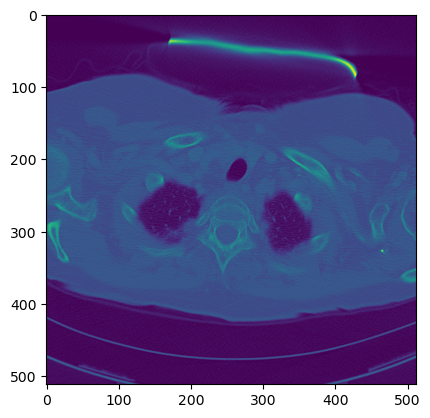

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(vol_arr[10])

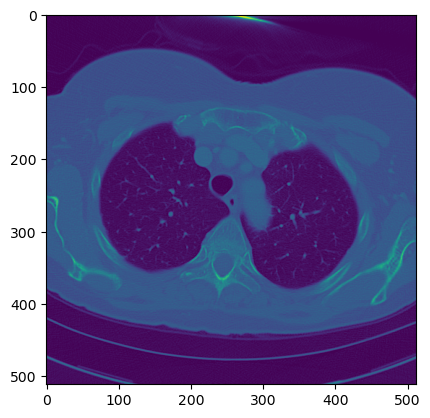

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(vol_arr[20])

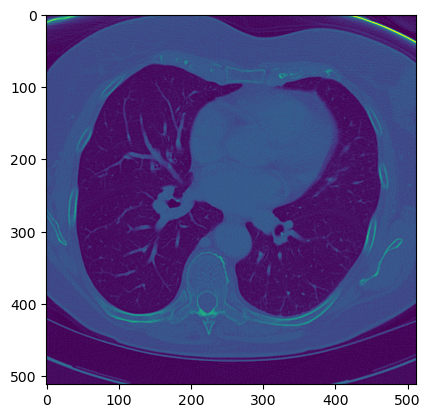

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(vol_arr[50])

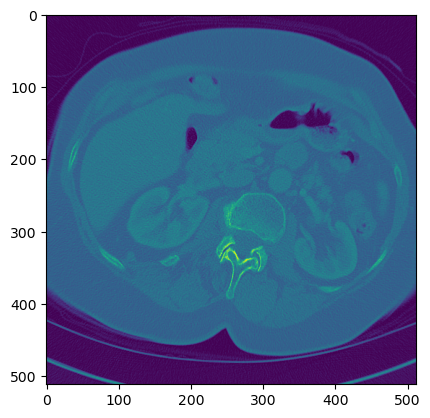

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(vol_arr[98])

## 와인 데이터 분석

In [16]:
import pandas as pd
import numpy as np
# 데이터를 불러오는 방식은 내가 편한 방법으로 살짝 수정해서 불러왔다.

wine_path = "./data/p1ch4/tabular-wine/winequality-white.csv"
df = pd.read_csv(wine_path,dtype=np.float32, delimiter=";")
wineq_numpy = np.array(df)
wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [17]:
# col_list = next(csv.reader(open(wine_path), delimiter=';'))
col_list = list(df.columns)

wineq_numpy.shape, col_list

((4898, 12),
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'])

In [18]:
wineq = torch.from_numpy(wineq_numpy) # 넘파이 배열에서 텐서로바꿔준다.

wineq.shape, wineq.dtype

(torch.Size([4898, 12]), torch.float32)

In [19]:
data = wineq[:, :-1] # 마지막 열을 제외하고 모두
data, data.shape

(tensor([[ 7.0000,  0.2700,  0.3600,  ...,  3.0000,  0.4500,  8.8000],
         [ 6.3000,  0.3000,  0.3400,  ...,  3.3000,  0.4900,  9.5000],
         [ 8.1000,  0.2800,  0.4000,  ...,  3.2600,  0.4400, 10.1000],
         ...,
         [ 6.5000,  0.2400,  0.1900,  ...,  2.9900,  0.4600,  9.4000],
         [ 5.5000,  0.2900,  0.3000,  ...,  3.3400,  0.3800, 12.8000],
         [ 6.0000,  0.2100,  0.3800,  ...,  3.2600,  0.3200, 11.8000]]),
 torch.Size([4898, 11]))

In [20]:
target = wineq[:, -1] # 마지막 열만 선택
target, target.shape 

(tensor([6., 6., 6.,  ..., 6., 7., 6.]), torch.Size([4898]))

In [21]:
# 라벨 인코딩
target = wineq[:, -1].long()
target

tensor([6, 6, 6,  ..., 6, 7, 6])

In [22]:
target.shape

torch.Size([4898])

In [23]:
# 원핫 인코딩
# scatter_: 텐서 바꿔치기
# 인자1 dim - 값을 할당할 차원을 지정
# 인자2 index - 값이 할당될 인덱스 포함
# 인자3 src - 할당할 값

target_onehot = torch.zeros(target.shape[0], 10) # 텐서 초기화

target_onehot.scatter_(1, target.unsqueeze(1), 1.0) 
# unsqueeze: 텐서에 차원을 추가 (N, 1)형식으로 만듬-> (4898,1)이 됨.

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [24]:
# target_unsqueezed = target.unsqueeze(1) 
# target_unsqueezed

In [25]:
data_mean = torch.mean(data, dim=0)
data_mean

tensor([6.8548e+00, 2.7824e-01, 3.3419e-01, 6.3914e+00, 4.5772e-02, 3.5308e+01,
        1.3836e+02, 9.9403e-01, 3.1883e+00, 4.8985e-01, 1.0514e+01])

In [26]:
data_var = torch.var(data, dim=0)
data_var

tensor([7.1211e-01, 1.0160e-02, 1.4646e-02, 2.5726e+01, 4.7733e-04, 2.8924e+02,
        1.8061e+03, 8.9455e-06, 2.2801e-02, 1.3025e-02, 1.5144e+00])

In [27]:
# 정규화
data_normalized = (data - data_mean) / torch.sqrt(data_var)
data_normalized

tensor([[ 1.7208e-01, -8.1761e-02,  2.1326e-01,  ..., -1.2468e+00,
         -3.4915e-01, -1.3930e+00],
        [-6.5743e-01,  2.1587e-01,  4.7997e-02,  ...,  7.3995e-01,
          1.3417e-03, -8.2419e-01],
        [ 1.4756e+00,  1.7450e-02,  5.4378e-01,  ...,  4.7505e-01,
         -4.3677e-01, -3.3663e-01],
        ...,
        [-4.2043e-01, -3.7940e-01, -1.1915e+00,  ..., -1.3130e+00,
         -2.6153e-01, -9.0545e-01],
        [-1.6054e+00,  1.1666e-01, -2.8253e-01,  ...,  1.0049e+00,
         -9.6251e-01,  1.8574e+00],
        [-1.0129e+00, -6.7703e-01,  3.7852e-01,  ...,  4.7505e-01,
         -1.4882e+00,  1.0448e+00]])

In [28]:
# 이상치 찾기
bad_indexes = target <= 3 # target이 3 이하인거 true 아닌거 false
bad_indexes.shape, bad_indexes.dtype, bad_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(20))

In [29]:
bad_data = data[bad_indexes] # target이 3이하인 데이터는 20개밖에 없음
bad_data.shape

torch.Size([20, 11])

In [30]:
bad_data

tensor([[8.5000e+00, 2.6000e-01, 2.1000e-01, 1.6200e+01, 7.4000e-02, 4.1000e+01,
         1.9700e+02, 9.9800e-01, 3.0200e+00, 5.0000e-01, 9.8000e+00],
        [5.8000e+00, 2.4000e-01, 4.4000e-01, 3.5000e+00, 2.9000e-02, 5.0000e+00,
         1.0900e+02, 9.9130e-01, 3.5300e+00, 4.3000e-01, 1.1700e+01],
        [9.1000e+00, 5.9000e-01, 3.8000e-01, 1.6000e+00, 6.6000e-02, 3.4000e+01,
         1.8200e+02, 9.9680e-01, 3.2300e+00, 3.8000e-01, 8.5000e+00],
        [7.1000e+00, 3.2000e-01, 3.2000e-01, 1.1000e+01, 3.8000e-02, 1.6000e+01,
         6.6000e+01, 9.9370e-01, 3.2400e+00, 4.0000e-01, 1.1500e+01],
        [6.9000e+00, 3.9000e-01, 4.0000e-01, 4.6000e+00, 2.2000e-02, 5.0000e+00,
         1.9000e+01, 9.9150e-01, 3.3100e+00, 3.7000e-01, 1.2600e+01],
        [1.0300e+01, 1.7000e-01, 4.7000e-01, 1.4000e+00, 3.7000e-02, 5.0000e+00,
         3.3000e+01, 9.9390e-01, 2.8900e+00, 2.8000e-01, 9.6000e+00],
        [7.9000e+00, 6.4000e-01, 4.6000e-01, 1.0600e+01, 2.4400e-01, 3.3000e+01,
         2.27

In [31]:
bad_data = data[target <= 3]
mid_data = data[(target > 3) & (target < 7)]
good_data = data[target >= 7]

bad_mean = torch.mean(bad_data, dim=0)
mid_mean = torch.mean(mid_data, dim=0)
good_mean = torch.mean(good_data, dim=0)

# 나쁜거, 보통, 좋은 카테고리의 열을 평균내기
for i, args in enumerate(zip(col_list, bad_mean, mid_mean, good_mean)):
    print('{:2} {:20} {:6.2f} {:6.2f} {:6.2f}'.format(i, *args))

# 나쁜 와인일 수록 sulfur dioxide(이산화황)가 높음

 0 fixed acidity          7.60   6.89   6.73
 1 volatile acidity       0.33   0.28   0.27
 2 citric acid            0.34   0.34   0.33
 3 residual sugar         6.39   6.71   5.26
 4 chlorides              0.05   0.05   0.04
 5 free sulfur dioxide   53.33  35.42  34.55
 6 total sulfur dioxide 170.60 141.83 125.25
 7 density                0.99   0.99   0.99
 8 pH                     3.19   3.18   3.22
 9 sulphates              0.47   0.49   0.50
10 alcohol               10.34  10.26  11.42


In [32]:
total_sulfur_threshold = 141.83 # 보통의 평균 값
total_sulfur_data = data[:,6]
predicted_indexes = torch.lt(total_sulfur_data, total_sulfur_threshold)

predicted_indexes.shape, predicted_indexes.dtype, predicted_indexes.sum()
# 이 임계값에서 2727개를 좋은 품질로 평가할 수 있음

(torch.Size([4898]), torch.bool, tensor(2727))

In [33]:
actual_indexes = target > 5

actual_indexes.shape, actual_indexes.dtype, actual_indexes.sum()
# target이 5보다 크다에 해당하는 실제 값이 직전 코드에서 설정한 임계값보다 큼 -> 임계값이 완벽하지 않음

(torch.Size([4898]), torch.bool, tensor(3258))

In [34]:
n_matches = torch.sum(actual_indexes & predicted_indexes).item()
n_predicted = torch.sum(predicted_indexes).item()
n_actual = torch.sum(actual_indexes).item()

n_matches, n_matches / n_predicted, n_matches / n_actual
# 74% 확률로 품질이 좋은 와인을 걸러냈으나, 61%만 구별해냄

(2018, 0.74000733406674, 0.6193984039287906)

## 시계열 데이터 
사이의 캐피탈 바이크 쉐어 공유 자전거 시스템의 시간대별 자전거 대여 데이터 + 날씨와 계절 데이터

In [36]:
bikes_numpy = np.loadtxt(
    "./data/p1ch4/bike-sharing-dataset/hour-fixed.csv", 
    dtype=np.float32, 
    delimiter=",", 
    skiprows=1, 
    converters={1: lambda x: float(x[8:10])}) # 첫 번째 열의 일자 문자열을 숫자로 변환해주는 로직
bikes = torch.from_numpy(bikes_numpy)
bikes

tensor([[1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 3.0000e+00, 1.3000e+01,
         1.6000e+01],
        [2.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 8.0000e+00, 3.2000e+01,
         4.0000e+01],
        [3.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 5.0000e+00, 2.7000e+01,
         3.2000e+01],
        ...,
        [1.7377e+04, 3.1000e+01, 1.0000e+00,  ..., 7.0000e+00, 8.3000e+01,
         9.0000e+01],
        [1.7378e+04, 3.1000e+01, 1.0000e+00,  ..., 1.3000e+01, 4.8000e+01,
         6.1000e+01],
        [1.7379e+04, 3.1000e+01, 1.0000e+00,  ..., 1.2000e+01, 3.7000e+01,
         4.9000e+01]])

In [37]:
bikes.shape, bikes.stride()

(torch.Size([17520, 17]), (17, 1))

In [38]:
daily_bikes = bikes.view(-1, 24, bikes.shape[1]) # 형태 바꿔줌
daily_bikes.shape, daily_bikes.stride()

(torch.Size([730, 24, 17]), (408, 17, 1))

In [39]:
daily_bikes = daily_bikes.transpose(1, 2)
daily_bikes.shape, daily_bikes.stride()

(torch.Size([730, 17, 24]), (408, 1, 17))

In [76]:
first_day = bikes[:24].long()
weather_onehot = torch.zeros(first_day.shape[0], 4)
first_day[:,9]

tensor([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2])

In [78]:
weather_onehot.scatter_(
    dim=1, 
    index=first_day[:,9].unsqueeze(1).long() - 1, # <1>
    value=1.0)

tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]])

In [82]:
torch.cat((bikes[:24], weather_onehot), 1)[:1]

tensor([[ 1.0000,  1.0000,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  6.0000,
          0.0000,  1.0000,  0.2400,  0.2879,  0.8100,  0.0000,  3.0000, 13.0000,
         16.0000,  1.0000,  0.0000,  0.0000,  0.0000]])

In [84]:
daily_weather_onehot = torch.zeros(daily_bikes.shape[0], 4,
                                   daily_bikes.shape[2])
daily_weather_onehot.shape

torch.Size([730, 4, 24])

In [86]:
daily_weather_onehot.scatter_(
    1, daily_bikes[:,9,:].long().unsqueeze(1) - 1, 1.0)
daily_weather_onehot.shape

torch.Size([730, 4, 24])

In [90]:
daily_bikes = torch.cat((daily_bikes, daily_weather_onehot), dim=1)

In [92]:
daily_bikes[:, 9, :] = (daily_bikes[:, 9, :] - 1.0) / 3.0

In [94]:
temp = daily_bikes[:, 10, :]
temp_min = torch.min(temp)
temp_max = torch.max(temp)
daily_bikes[:, 10, :] = ((daily_bikes[:, 10, :] - temp_min)
                         / (temp_max - temp_min))

In [96]:
temp = daily_bikes[:, 10, :]
daily_bikes[:, 10, :] = ((daily_bikes[:, 10, :] - torch.mean(temp))
                         / torch.std(temp))

## 텍스트

In [99]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, threshold=50)

In [101]:
with open('./data/p1ch4/jane-austen/1342-0.txt', encoding='utf8') as f:
    text = f.read()

In [103]:
lines = text.split('\n')
line = lines[200]
line

'“Impossible, Mr. Bennet, impossible, when I am not acquainted with him'

In [105]:
letter_t = torch.zeros(len(line), 128) # <1> 
letter_t.shape

torch.Size([70, 128])

In [107]:
for i, letter in enumerate(line.lower().strip()):
    letter_index = ord(letter) if ord(letter) < 128 else 0  # <1>
    letter_t[i][letter_index] = 1

In [109]:
def clean_words(input_str):
    punctuation = '.,;:"!?”“_-'
    word_list = input_str.lower().replace('\n',' ').split()
    word_list = [word.strip(punctuation) for word in word_list]
    return word_list

words_in_line = clean_words(line)
line, words_in_line

('“Impossible, Mr. Bennet, impossible, when I am not acquainted with him',
 ['impossible',
  'mr',
  'bennet',
  'impossible',
  'when',
  'i',
  'am',
  'not',
  'acquainted',
  'with',
  'him'])

In [111]:
word_list = sorted(set(clean_words(text)))
word2index_dict = {word: i for (i, word) in enumerate(word_list)}

len(word2index_dict), word2index_dict['impossible']

(7261, 3394)

In [113]:
word_t = torch.zeros(len(words_in_line), len(word2index_dict))
for i, word in enumerate(words_in_line):
    word_index = word2index_dict[word]
    word_t[i][word_index] = 1
    print('{:2} {:4} {}'.format(i, word_index, word))
    
print(word_t.shape)

 0 3394 impossible
 1 4305 mr
 2  813 bennet
 3 3394 impossible
 4 7078 when
 5 3315 i
 6  415 am
 7 4436 not
 8  239 acquainted
 9 7148 with
10 3215 him
torch.Size([11, 7261])


In [115]:
word_t = word_t.unsqueeze(1)
word_t.shape

torch.Size([11, 1, 7261])

In [117]:
[(c, ord(c)) for c in sorted(set(text))]

[('\n', 10),
 (' ', 32),
 ('!', 33),
 ('#', 35),
 ('$', 36),
 ('%', 37),
 ("'", 39),
 ('(', 40),
 (')', 41),
 ('*', 42),
 (',', 44),
 ('-', 45),
 ('.', 46),
 ('/', 47),
 ('0', 48),
 ('1', 49),
 ('2', 50),
 ('3', 51),
 ('4', 52),
 ('5', 53),
 ('6', 54),
 ('7', 55),
 ('8', 56),
 ('9', 57),
 (':', 58),
 (';', 59),
 ('?', 63),
 ('@', 64),
 ('A', 65),
 ('B', 66),
 ('C', 67),
 ('D', 68),
 ('E', 69),
 ('F', 70),
 ('G', 71),
 ('H', 72),
 ('I', 73),
 ('J', 74),
 ('K', 75),
 ('L', 76),
 ('M', 77),
 ('N', 78),
 ('O', 79),
 ('P', 80),
 ('Q', 81),
 ('R', 82),
 ('S', 83),
 ('T', 84),
 ('U', 85),
 ('V', 86),
 ('W', 87),
 ('X', 88),
 ('Y', 89),
 ('Z', 90),
 ('[', 91),
 (']', 93),
 ('_', 95),
 ('a', 97),
 ('b', 98),
 ('c', 99),
 ('d', 100),
 ('e', 101),
 ('f', 102),
 ('g', 103),
 ('h', 104),
 ('i', 105),
 ('j', 106),
 ('k', 107),
 ('l', 108),
 ('m', 109),
 ('n', 110),
 ('o', 111),
 ('p', 112),
 ('q', 113),
 ('r', 114),
 ('s', 115),
 ('t', 116),
 ('u', 117),
 ('v', 118),
 ('w', 119),
 ('x', 120),
 ('y',

In [119]:
ord('l')

108